**Main Objective of the Analysis: Customer Segmentation for Improved Business Strategies**

In this section, our primary objective is to conduct a comprehensive customer segmentation analysis that empowers the business to make data-driven decisions. This analysis will enable us to understand the diverse customer base and extract valuable insights for targeted marketing strategies. We will focus on clustering to achieve this goal.

**Benefits of the Analysis to Business and Stakeholders:**

1. **Customer-Centric Strategies:** By segmenting customers, the business can craft highly targeted strategies that resonate with each segment's unique needs and preferences. This approach enhances customer satisfaction and engagement.

2. **Improved Customer Acquisition and Retention:** Understanding customer segments enables the business to create tailored acquisition and retention tactics. By appealing to specific segments, the business can attract new customers and nurture existing ones, thereby increasing customer loyalty.

3. **Enhanced Profitability:** With a clear understanding of customer behavior and purchasing patterns within each segment, the business can optimize pricing, product placement, and cross-selling strategies, ultimately boosting overall profitability.

4. **Resource Allocation:** Efficient resource allocation is achieved by allocating marketing efforts and resources where they are most likely to yield positive outcomes. This analysis guides the business in investing resources wisely and avoiding unnecessary expenditures.

5. **Informed Marketing Measures:** The insights gained from customer segmentation aid in designing targeted marketing campaigns. Messages, offers, and promotions can be tailored to resonate with specific segments, resulting in higher conversion rates.

6. **Personalized Customer Experiences:** Armed with insights into customer personalities, lifestyles, and psychographics, the business can create personalized experiences that foster stronger connections and loyalty.

7. **Strategic Decision-Making:** The data-driven insights derived from this analysis provide a solid foundation for strategic decision-making across various departments, from product development to customer service.


**The data includes the following features:**

1. Customer ID
2. Customer Gender
3. Customer Age
4. Annual Income of the customer (in Thousand Dollars)
5. Spending score of the customer (based on customer behaviour and spending nature)

In [2]:
# importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [3]:
# loading the data into the dataframe
df= pd.read_csv('c:\\Users\\dhruv\\OneDrive\\Desktop/Mall_Customers.csv', index_col = 0) #loads the csv file into a pandas dataframe
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [26]:
# Exploratory Data Analysis

print(df.dtypes)
print(df.shape)
df.describe()


Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
(200, 4)


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
# checking for null values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# checking for duplicate values
df.duplicated().sum()

0

**Bivariate Analysis — Scatterplot**
We are interested in identifying the relationship between the Annual Income (k$) and Spending Score (1–100) we would use the scatterplot.

Text(0.5, 1.0, 'Scatterplot Between Annual Income (k$) and Spending Score (1-100)')

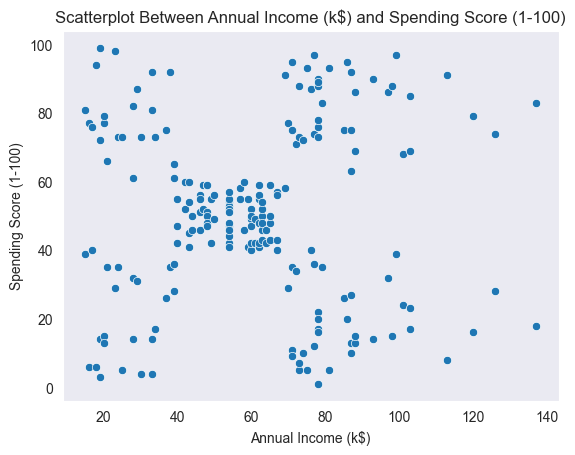

In [7]:
sns.set_style('dark')
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatterplot Between Annual Income (k$) and Spending Score (1-100)')

In [8]:
# we only need the Annual Income (k$) and Spending Score (1–100) columns.
X = df.loc[:, ['Annual Income (k$)','Spending Score (1-100)']].values
# show X
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [9]:
# scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)


**Unsupervised Learning**

1. **K-Means**

In [10]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X) #Finds the Kmeans to our data
    inertia.append(kmeans.inertia_) #This gives us the inertia values for each clusters

C:\Users\dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\d

<function matplotlib.pyplot.show(close=None, block=None)>

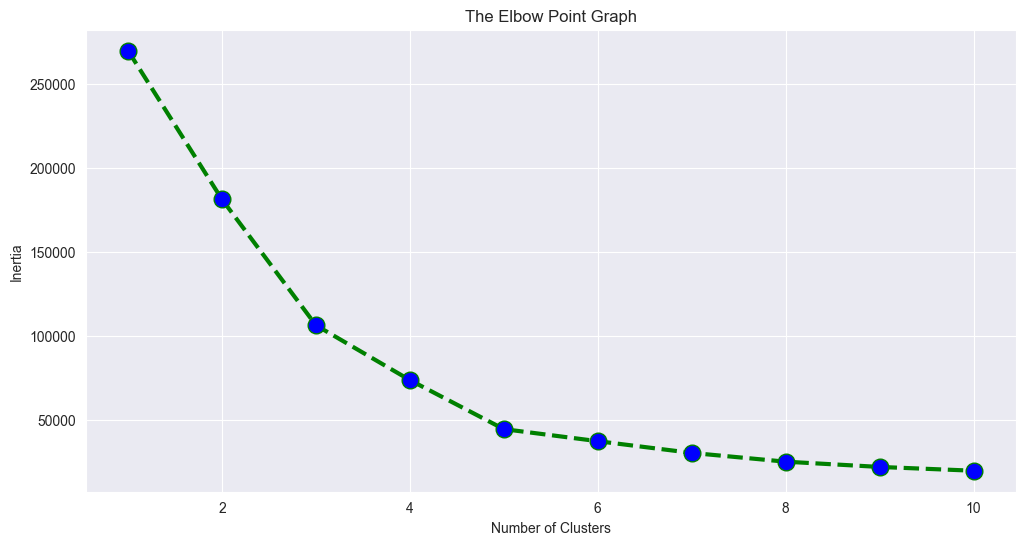

In [11]:
# plotting graph for the values
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11),inertia, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show

**choosing the ideal number of clusters as 5**

In [12]:
# Kmeans Clustering

kmeans= KMeans(n_clusters = 5, init = 'k-means++') #initialize the class object
label= kmeans.fit_predict(X) #returns a cluster number for each of the data points
print(label)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 2 0 4 0 2 0 2 0 4 0 2 0 2 0 2 0 2 0 4 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


C:\Users\dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


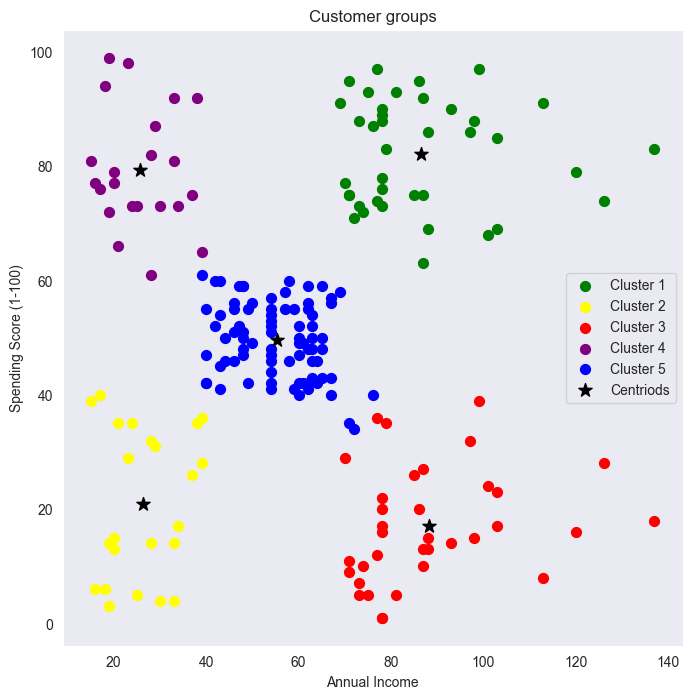

In [13]:
#visualizing the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[label == 0,0], X[label== 0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[label == 1,0], X[label== 1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[label == 2,0], X[label== 2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[label == 3,0], X[label== 3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[label == 4,0], X[label== 4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods') #Plotting the centriods
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()  

2. **HAC**

In [20]:
# training the HAC model

from sklearn.cluster import AgglomerativeClustering

# create the model
HAC = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# fit the model
HAC.fit(X)

# get the labels
HAC_labels = HAC.fit_predict(X)
print(HAC_labels)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


C:\Users\dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


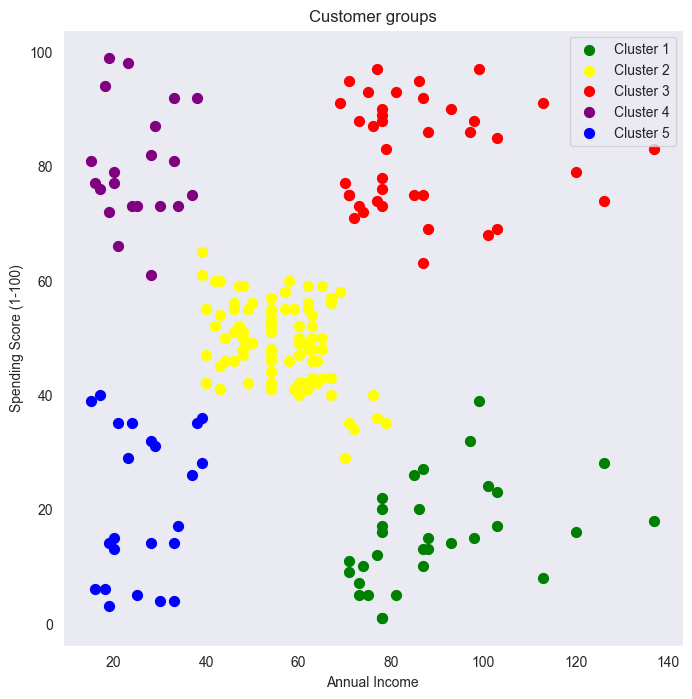

In [36]:
# visualizing the clusters from HAC using scatter plot according to their labels from 0-4
plt.figure(figsize=(8,8))
plt.scatter(X[HAC_labels==0,0],X[HAC_labels==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[HAC_labels==1,0],X[HAC_labels==1,1],s=50,c='yellow',label='Cluster 2')
plt.scatter(X[HAC_labels==2,0],X[HAC_labels==2,1],s=50,c='red',label='Cluster 3')
plt.scatter(X[HAC_labels==3,0],X[HAC_labels==3,1],s=50,c='purple',label='Cluster 4')
plt.scatter(X[HAC_labels==4,0],X[HAC_labels==4,1],s=50,c='blue',label='Cluster 5')

plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show() 

**GMM**

The silhouette score for the GMM model is:  0.5528243704895652


0    [0.9990321682162003, 0.0009519963507519339, 1....
1    [0.9997901891211856, 0.00018959373288075294, 1...
2    [0.9998137805420803, 0.00018621945669525288, 1...
3    [0.9996937582391634, 0.0001800842046519669, 0....
4    [0.9983785578451678, 0.0015566418112439423, 6....
dtype: object

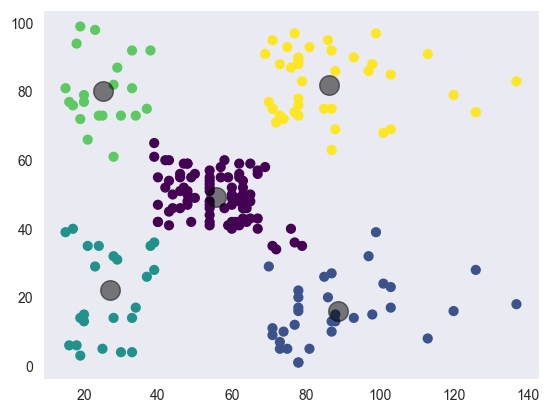

In [35]:
# implementing a GMM model to cluster the data

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

#training the model
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X)

#predicting the cluster for each data point
labels = gmm.predict(X)

#calculating the silhouette score
score = silhouette_score(X, labels, random_state=42)
print("The silhouette score for the GMM model is: ", score)

#plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

#plotting the centers of the clusters
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#the percentage of data points of a point being in a cluster
probs = gmm.predict_proba(X)

# a data frame, where each row represents a data point and each column represents a cluster, and the probability of that data point being in that cluster
prob_df = pd.DataFrame(probs)

# sort the probabilities in descending order
prob_sorted = prob_df.apply(lambda x: x.sort_values(ascending=False).values, axis=1)
prob_sorted.head()


**As we saw, the performance of all three clustering algorithms was fairly similar. However, the K-Means algorithm was the fastest.**

**The K-Means algorithm is the most appropriate algorithm for this data. This is because the data is fairly uniform and well separated.**

**Business Insights for KMeans**

**Cluster 1 (green):** These are average income earners with average spending scores. They are cautious with their spending at the store.

**Cluster 2 (yellow):** The customers in this group are high income earners and with high spending scores. They bring in profit. Discounts and other offers targeted at this group will increase their spending score and maximize profit.

**Cluster 3 (red):** This group of customers have a higher income but they do not spend more at the store. One of the assumption could be that they are not satisfied with the services rendered at the store. They are another ideal group to be targeted by the marketing team because they have the potential to bring in increased profit for the store.

**Cluster 4 (purple):** Low income earners with low spending score. I can assume that this is so because people with low income will tend to purchase less item at the store.

**Cluster 5 (blue):** These are low income earning customers with high spending scores. I can assume that why this group of customers spend more at the retail store despite earning less is because they enjoy and are satisfied with the services rendered at the retail store.

**Future Steps**

In the future, try to gain more datapoints, as 200 is a fairly small dataset for this.